## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATASET

In [2]:
df = pd.read_csv('/kaggle/input/udemy-courses-dataset/udemy_courses_dataset.csv')

## UNDERSTAND THE DATA

In [3]:
# pd.set_option('display.max_rows',None)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
df.shape

(3678, 12)

In [6]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [8]:
df.duplicated().sum()

6

## DATA CLEANING AND TRANSFORMATION

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [11]:
# Convert ['published_timestamp'] column dtype to DateTime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

## ANALYZE THE COLUMN 

In [12]:
df.course_title.value_counts().head(10)

course_title
Acoustic Blues Guitar Lessons                                   3
Creating an animated greeting card via Google Slides            3
Aprende a tocar el acordeón de botones                          2
Drum Lessons For Beginners                                      2
Introduction to Web Development                                 2
How to Make a Wordpress Website 2017                            2
The Complete Web Developer Masterclass: Beginner To Advanced    2
Instant Harmonica - play Yesterday + Scarborough Fair today!    1
Violin lessons for beginners                                    1
Old-Time Banjo for the Absolute Beginner                        1
Name: count, dtype: int64

In [13]:
df = df.drop('url',axis=1)

In [14]:
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance


In [15]:
df.is_paid.unique()

array([ True, False])

In [16]:
paid_or_free = df.is_paid.value_counts()
paid_or_free

is_paid
True     3362
False     310
Name: count, dtype: int64

In [17]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [18]:
course_level = df.level.value_counts()
course_level = df.groupby('level')['num_subscribers'].sum()
course_level

level
All Levels            6871791
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [19]:
df.content_duration.describe()

count    3672.000000
mean        4.097603
std         6.057830
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

affordable_courses = df[df['price'] < 50]
total_enrollments =df['num_subscribers']].sum(.affordable_courses
total_enrollments")


In [20]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [21]:
df['revenue'] = df['price'] * df['num_subscribers']
df.revenue.head(10)

0     429400
1     209400
2      97830
3     232845
4     255200
5    1383150
6     100100
7     277115
8    1008540
9     165400
Name: revenue, dtype: int64

In [22]:
affordable_courses = df[df['price'] < 50]
total_subscribers = df['num_subscribers'].sum()
df_affordable= (affordable_courses['num_subscribers'].sum() / total_subscribers) * 100
print(f"Affordable courses contribute {df_affordable:.2f}% of total subscribers.")
if df_affordable > 40:
    print("Focus on offering more affordable courses to capture this cost-sensitive audience.")

Affordable courses contribute 49.24% of total subscribers.
Focus on offering more affordable courses to capture this cost-sensitive audience.


## DATA VISUALIZATION

In [23]:
# Top 5 most demand courses

top_courses = df[['course_title','num_subscribers']].sort_values(by='num_subscribers',ascending = False).head(5)
top_courses

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512


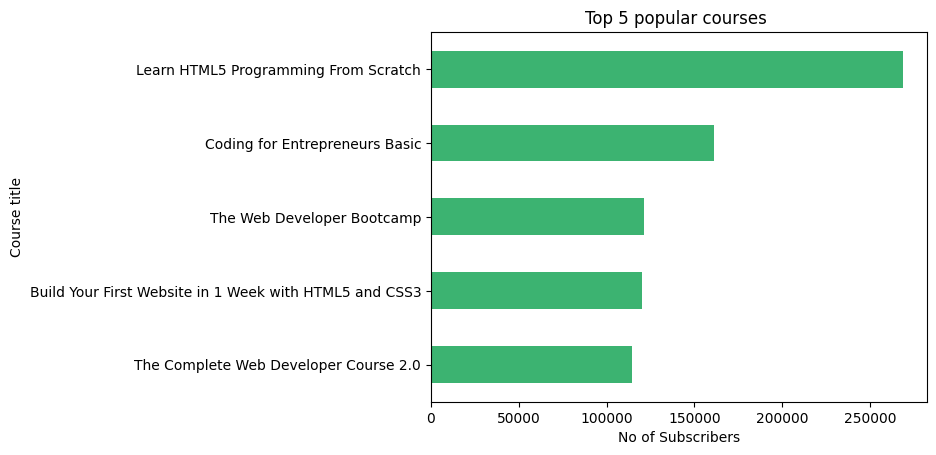

In [24]:
# Bar Chart for top 5 most demand course
top_courses.plot(kind='barh',
                 x='course_title',
                 y='num_subscribers',
                 color='mediumseagreen')
plt.title('Top 5 popular courses ')
plt.ylabel('Course title')
plt.xlabel('No of Subscribers')
plt.gca().invert_yaxis()
plt.legend().remove()
plt.show()

In [25]:
# Number of Subscribers and Average Sales per year
df['year'] = df['published_timestamp'].dt.year
avg_sales = df.groupby('year')['num_subscribers'].mean()
no_of_courses = df.groupby('year')['course_title'].count()

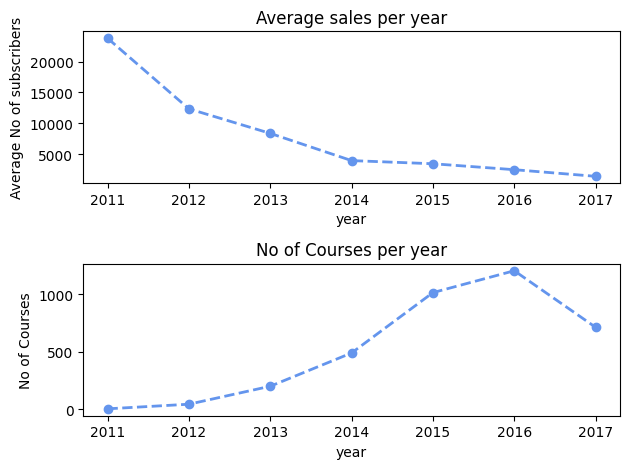

In [26]:
# Line Chart for Number of Subscribers and Average Sales per year
fig,ax = plt.subplots(2,1)
avg_sales.plot(kind='line',
               ax=ax[0],
               linestyle='--',
               color='cornflowerblue',
               linewidth=2, 
               marker='o')
ax[0].set_title('Average sales per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Average No of subscribers')

no_of_courses.plot(kind='line',
                   ax=ax[1],
                   linestyle='--', 
                   color='cornflowerblue',
                   linewidth=2,
                   marker='o')
ax[1].set_title('No of Courses per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('No of Courses')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

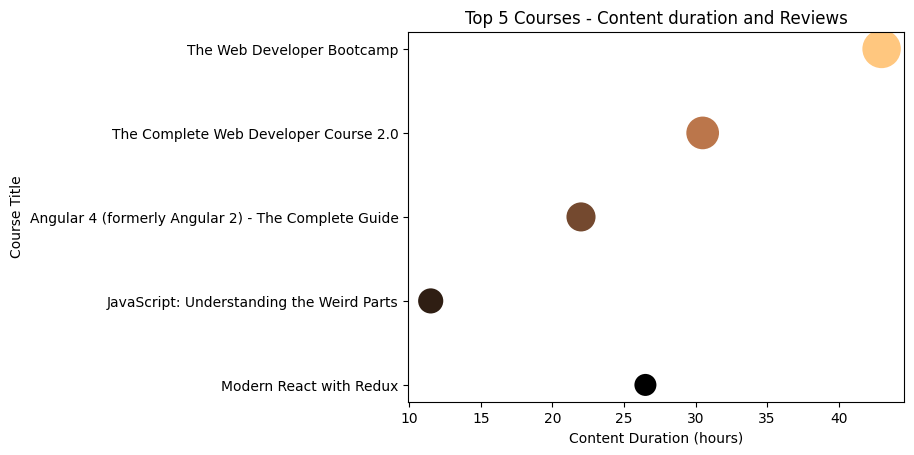

In [27]:
# Scatterplot for No of Reviews and the Content duration
course_by_review = df.sort_values(by='num_reviews',ascending=False).head(5)
sns.scatterplot(data=course_by_review
                ,x='content_duration',
                y='course_title',
                size='num_reviews',
                sizes=(300,850),
                hue='num_reviews',
                palette='copper')
plt.title('Top 5 Courses - Content duration and Reviews')
plt.xlabel('Content Duration (hours)')
plt.ylabel('Course Title')
plt.legend().set_visible(False)
plt.show

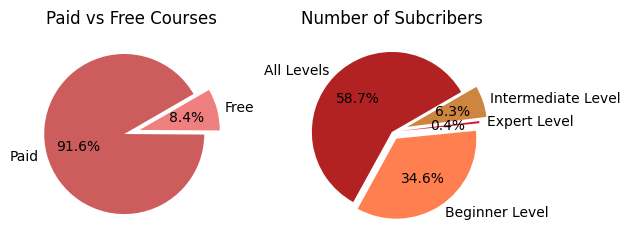

In [28]:
# Piechart for Paid vs Free courses and Number of Subscribers per level
fig,ax=plt.subplots(1,2)
figsize=(40,20)
ax[0].pie(paid_or_free,
        labels=['Paid','Free'],
        autopct='%1.1f%%',
        colors=['indianred','lightcoral'],
        startangle=30,
        explode=[0.1,0.1])
ax[0].set_title('Paid vs Free Courses')

ax[1].pie(course_level,
        labels=course_level.index,
        autopct='%1.1f%%',
        colors=['firebrick','coral','crimson','peru'],  
        startangle=30,
        explode = [0, 0.1, 0.1, 0.2])
ax[1].set_title('Number of Subcribers')
plt.tight_layout()
plt.show()

In [29]:
num_corr = df[['price','num_reviews','num_subscribers','revenue']].corr()
num_corr

,price,num_reviews,num_subscribers,revenue
price,1.000000,0.113568,0.050436,0.346828
num_reviews,0.113568,1.000000,0.651070,0.770577
num_subscribers,0.050436,0.651070,1.000000,0.555712
revenue,0.346828,0.770577,0.555712,1.000000


Text(0.5, 1.0, 'Correlation Heatmap: Price, Subscribers, Reviews, Revenue')

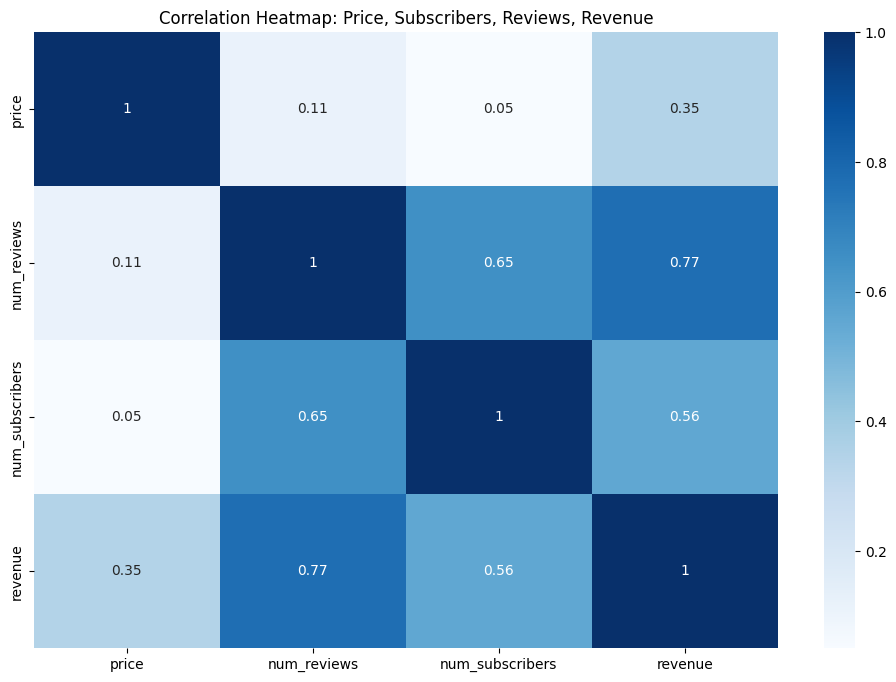

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(num_corr,annot=True,cmap='Blues')
plt.title("Correlation Heatmap: Price, Subscribers, Reviews, Revenue" )

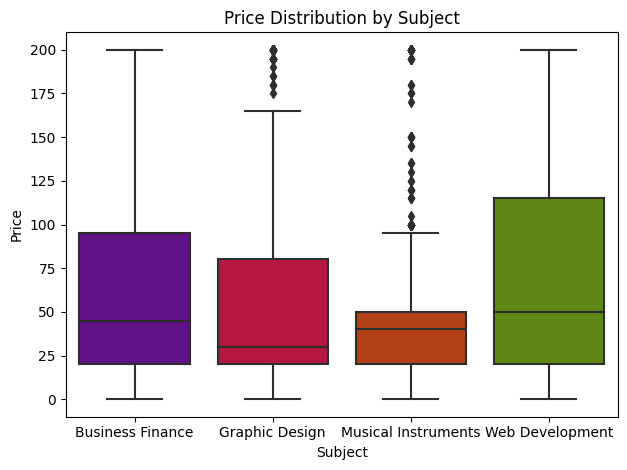

In [31]:
# Boxplt for Price distribution for all subjects
sns.boxplot(data=df, 
            x='subject', 
            y='price',
            palette = 'brg')

plt.title('Price Distribution by Subject')
plt.xlabel('Subject')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
